In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

%matplotlib notebook

from run_utils import run_env_experiment, plot_ratings_mses

sys.path.append('../') 
from reclab.environments.latent_factors import DatasetLatentFactor, LatentFactorBehavior

from reclab.recommenders import LibFM
from reclab.recommenders import KNNRecommender
from reclab.recommenders import TopPop
from reclab.recommenders import RandomRec
from reclab.recommenders import PerfectRec



/Users/karlk/.bin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/karlk/.bin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/karlk/.bin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/karlk/.bin/anaconda3/lib/python3.7/site-packages/tensorflow/

# Exploration with Different User Behaviors

In this notebook, for a fixed level of model and user behavior complexity, we illustrate how epsilon-greedy exploration strategies compare for static and dynamin user models.

In [11]:
## Key Parameters across all settings
expdirname = 'dynamic_user_static_rec'

topics = True

num_users = 100
num_items = 1000

env_params = {
    'num_users': num_users,
    'num_items': num_items,
    'rating_frequency': 0.5,
    'num_init_ratings': 0
}

exp_params = {
    'n_trials': 10,
    'len_trial': 100,
    'SEED': 24532,
}
num_init_ratings = 1000

In [12]:

recommenders_base = [
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.01,
    ),
    RandomRec(
    ),
    TopPop(
    ),
] 

recommenders_base = []

## Static User Behavior

Here, the user model does not change over time. 

In [13]:
params = {'latent_dim': 8}
env_params_dataset = {key:env_params[key] for key in env_params.keys() if key not in ['num_users', 'num_items']}
for key in ['num_users', 'num_items']:
    env_params_dataset['max_'+key] = env_params[key]
env = DatasetLatentFactor('ml-100k', **params, **env_params_dataset)

def get_rating(env):
    def func(user_id, item_id):
        ratings = env.dense_ratings
        return ratings[user_id, item_id]
    return func

recommenders = recommenders_base + [PerfectRec(get_rating(env))]

datafilename = 'static_2'+env.name+'.npz'


ratings, preds = run_env_experiment([env], recommenders, exp_params['n_trials'], exp_params['len_trial'], 
                                    expdirname, datafilename, overwrite=True)

  2%|▏         | 2/100 [00:00<00:07, 12.55it/s]

Started experiments on environment: latent-ml-100k
Running trials for recommender: perfect
Running trial: 0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0}.


  2%|▏         | 2/100 [00:00<00:08, 12.25it/s]

Running trial: 1
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0}.


  2%|▏         | 2/100 [00:00<00:07, 12.67it/s]

Running trial: 2
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0}.


  2%|▏         | 2/100 [00:00<00:08, 11.83it/s]

Running trial: 3
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0}.


  2%|▏         | 2/100 [00:00<00:07, 12.59it/s]

Running trial: 4
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0}.


  2%|▏         | 2/100 [00:00<00:07, 12.69it/s]

Running trial: 5
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0}.


  2%|▏         | 2/100 [00:00<00:07, 12.82it/s]

Running trial: 6
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0}.


  2%|▏         | 2/100 [00:00<00:07, 12.92it/s]

Running trial: 7
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0}.


  2%|▏         | 2/100 [00:00<00:08, 11.40it/s]

Running trial: 8
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0}.


  2%|▏         | 2/100 [00:00<00:07, 12.86it/s]

Running trial: 9
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0}.


100%|██████████| 100/100 [00:09<00:00, 10.90it/s]


Saving to data/dynamic_user_static_rec/static_2latent-ml-100k.npz


<IPython.core.display.Javascript object>


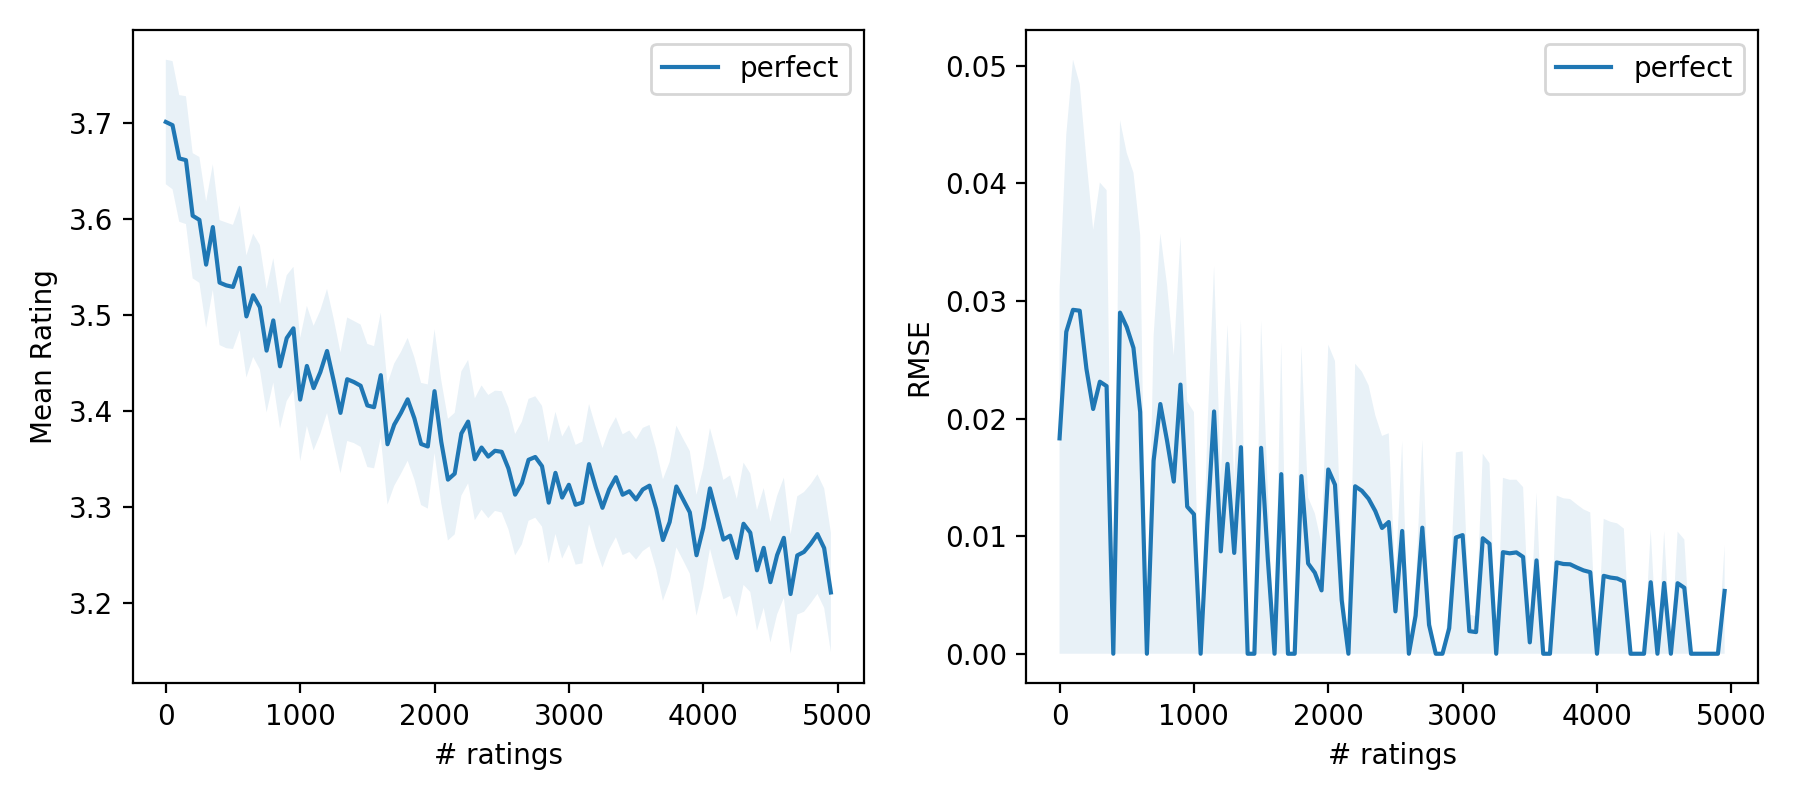

In [14]:
plot_ratings_mses(ratings[0], preds[0], env_params['num_init_ratings'], ['perfect'])

In [11]:
preds[preds > 10e10] = 0

/home/sarah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [9]:
params = {'latent_dim': 8}

env = LatentFactorBehavior(**params, **env_params)

recommenders = recommenders_base + [PerfectRec(env._get_rating)]


datafilename = 'static_2'+env.name+'.npz'

ratings, preds = run_env_experiment([env], recommenders, exp_params['n_trials'], exp_params['len_trial'], 
                                    expdirname, datafilename, overwrite=True)

Saving to data/dynamic_user_static_rec/static_2latent.npz


<IPython.core.display.Javascript object>


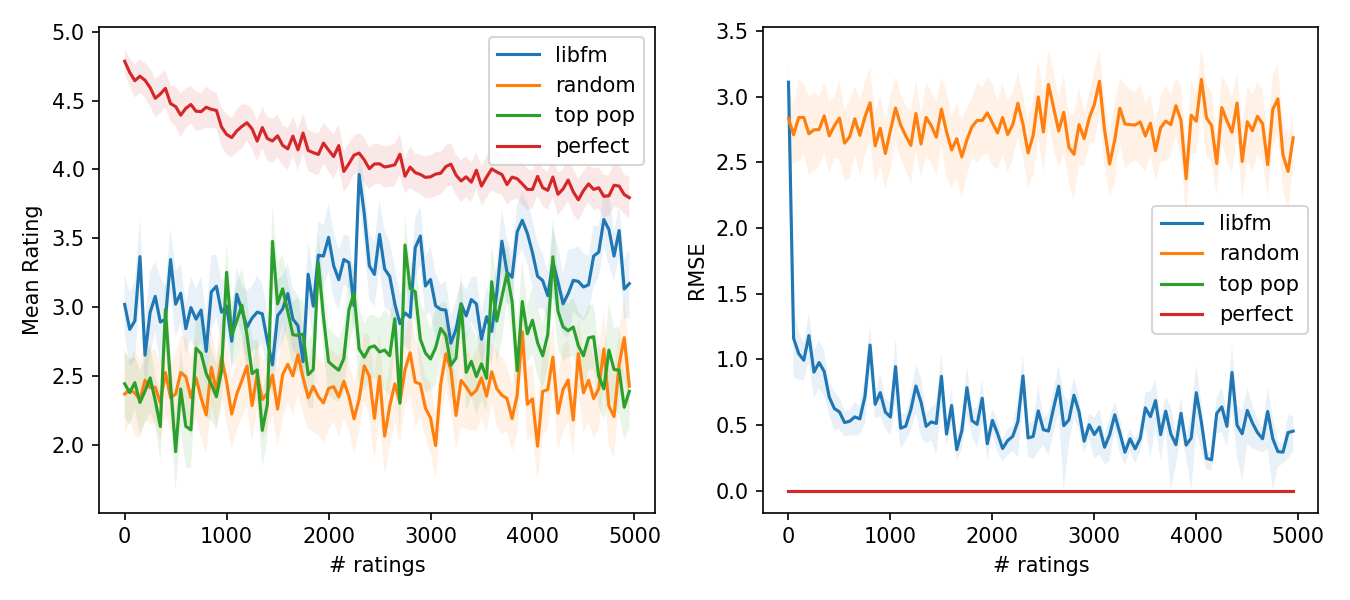

In [12]:
plot_ratings_mses(ratings[0], preds[0], env_params['num_init_ratings'], ['libfm', 'random', 'top pop', 'perfect'])

## Dynamic User Behavior

Users gradually become more interested in topics that they are exposed to, but also exhibit boredom when they see many similar items in a row.

In [13]:
params = {'latent_dim': 8, 'affinity_change': 0.1, 'memory_length': 5, 
          'boredom_threshold': 0.5, 'boredom_penalty': 1.0}
env = DatasetLatentFactor('ml-100k', **params, **env_params_dataset)

recommenders = recommenders_base + [PerfectRec(env._get_rating)]

datafilename = 'boredom_and_interest_'+env.name+'.npz'
ratings, preds = run_env_experiment([env], recommenders, exp_params['n_trials'], exp_params['len_trial'], 
                                    expdirname, datafilename, overwrite=True)

Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0}.
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0}.
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 1682, "max_num_it

<IPython.core.display.Javascript object>


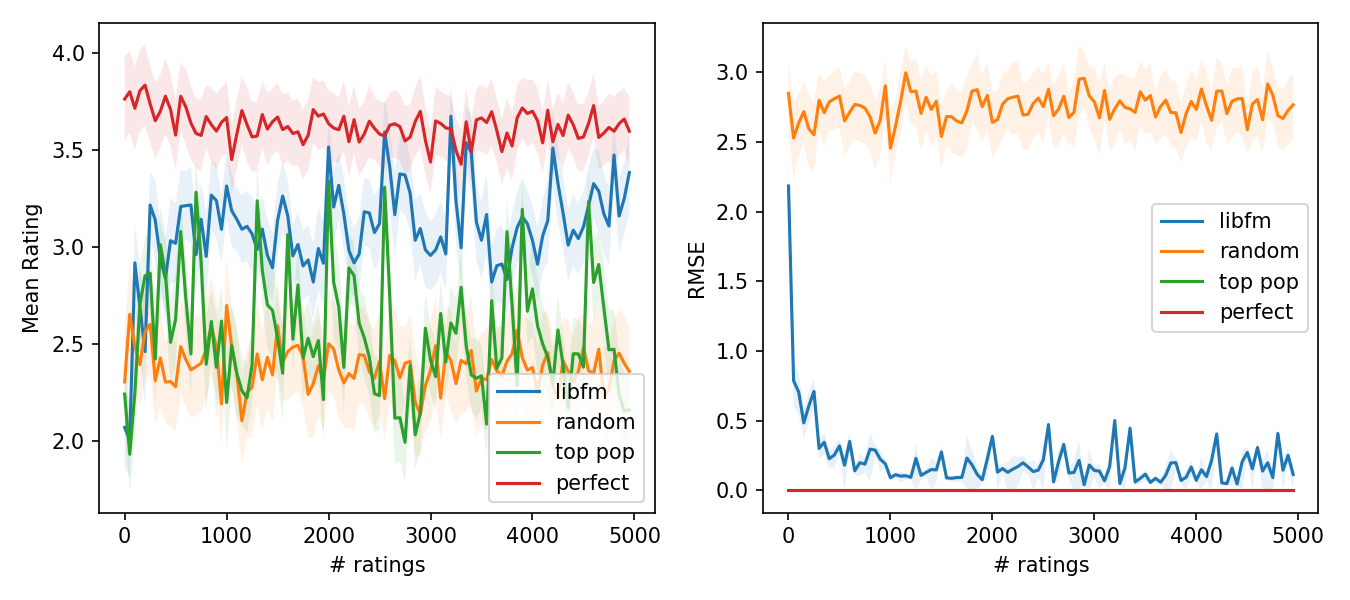

In [15]:
plot_ratings_mses(ratings[0], preds[0], env_params['num_init_ratings'], ['libfm', 'random', 'top pop', 'perfect'])

In [18]:
preds[preds > 10e10] = 0

/home/sarah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [16]:
params = {'latent_dim': 8, 'affinity_change': 0.1, 'memory_length': 5, 
          'boredom_threshold': 0.5, 'boredom_penalty': 1.0}
env = LatentFactorBehavior(**params, **env_params)

recommenders = recommenders_base + [PerfectRec(env._get_rating)]


datafilename = 'boredom_and_interest_'+env.name+'.npz'
ratings, preds = run_env_experiment([env], recommenders, exp_params['n_trials'], exp_params['len_trial'], 
                                    expdirname, datafilename, overwrite=True)

Saving to data/dynamic_user_static_rec/boredom_and_interest_latent.npz


<IPython.core.display.Javascript object>


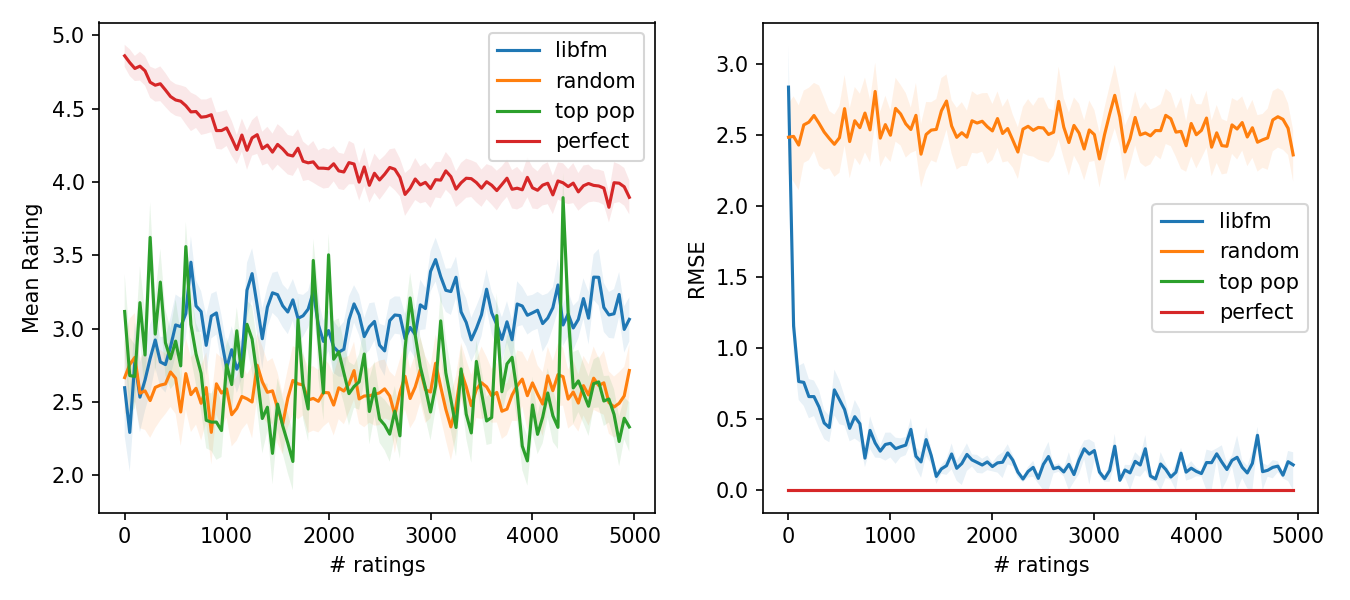

In [19]:
plot_ratings_mses(ratings[0], preds[0], env_params['num_init_ratings'], ['libfm', 'random', 'top pop', 'perfect'])